In [44]:
# Jupyter Notebook Cell 1: Imports and Data Loading

import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set default plot style
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100  # For higher resolution plots

# Your provided data as a multi-line string
path = "../output/protenn2/v1"
input_path = os.path.join(path, "metrics_df.csv")
output_path = path

# Read the data into a pandas DataFrame
df = pd.read_csv(input_path)

print("DataFrame head:")
print(df.head())
print("\nDataFrame info:")
df

DataFrame head:
   epoch  train_loss  val_loss  train_accuracy  val_accuracy  train_f1_macro  \
0      1    1.709624  0.960721        0.148003      0.375861        0.136285   
1      2    0.793214  0.719823        0.459336      0.508714        0.494866   
2      3    0.624065  0.677942        0.561764      0.599116        0.620512   
3      4    0.554752  0.651789        0.607581      0.577918        0.670583   
4      5    0.504795  0.699204        0.634694      0.600529        0.692256   

   train_precision_macro  train_recall_macro  train_f1_weighted  \
0               0.248365            0.106038           0.183716   
1               0.683565            0.413852           0.538121   
2               0.797986            0.534011           0.646035   
3               0.840851            0.585010           0.691247   
4               0.856100            0.607670           0.717914   

   train_precision_weighted  train_recall_weighted  val_f1_macro  \
0                  0.295376     

,epoch,train_loss,val_loss,train_accuracy,val_accuracy,train_f1_macro,train_precision_macro,train_recall_macro,train_f1_weighted,train_precision_weighted,train_recall_weighted,val_f1_macro,val_precision_macro,val_recall_macro,val_f1_weighted,val_precision_weighted,val_recall_weighted
0,1,1.709624,0.960721,0.148003,0.375861,0.136285,0.248365,0.106038,0.183716,0.295376,0.148003,0.345229,0.617831,0.317826,0.408171,0.697792,0.375861
1,2,0.793214,0.719823,0.459336,0.508714,0.494866,0.683565,0.413852,0.538121,0.706051,0.459336,0.450619,0.671245,0.407001,0.556320,0.800541,0.508714
2,3,0.624065,0.677942,0.561764,0.599116,0.620512,0.797986,0.534011,0.646035,0.813832,0.561764,0.559383,0.744028,0.522819,0.637717,0.826530,0.599116
3,4,0.554752,0.651789,0.607581,0.577918,0.670583,0.840851,0.585010,0.691247,0.853502,0.607581,0.576335,0.791356,0.533335,0.622921,0.846275,0.577918
4,5,0.504795,0.699204,0.634694,0.600529,0.692256,0.856100,0.607670,0.717914,0.875058,0.634694,0.536208,0.707130,0.500386,0.641805,0.841382,0.600529
5,6,0.487950,0.609069,0.647276,0.588615,0.715779,0.874289,0.631925,0.730188,0.884686,0.647276,0.584638,0.790847,0.533294,0.644354,0.853639,0.588615
6,7,0.466879,0.635551,0.661274,0.555636,0.667680,0.811030,0.591940,0.742621,0.893745,0.661274,0.527252,0.718123,0.478658,0.615558,0.845935,0.555636
7,8,0.452890,0.617400,0.670467,0.594009,0.741097,0.894880,0.659658,0.750574,0.900162,0.670467,0.547563,0.719113,0.502727,0.649754,0.854025,0.594009
8,9,0.447821,0.615427,0.673978,0.563368,0.744150,0.898389,0.662006,0.755326,0.905740,0.673978,0.540112,0.730006,0.487536,0.629790,0.854733,0.563368
9,10,0.440672,0.615452,0.681719,0.621041,0.686432,0.825571,0.612463,0.761094,0.908327,0.681719,0.615965,0.787047,0.577189,0.665357,0.848678,0.621041


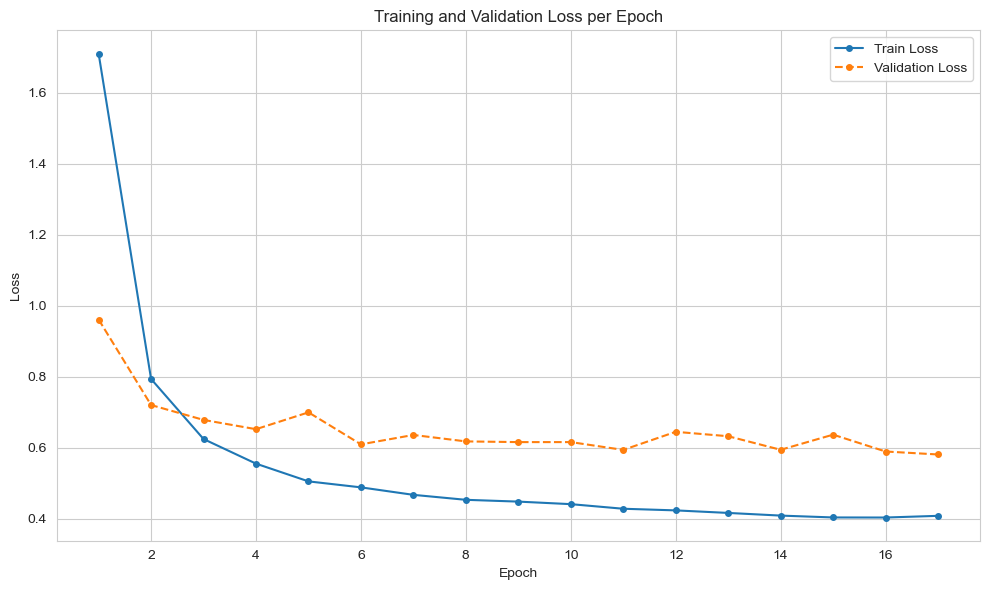

In [45]:
import os

# Jupyter Notebook Cell 2: Loss Curve Plot

plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['train_loss'], label='Train Loss', marker='o', markersize=4, linestyle='-')
plt.plot(df['epoch'], df['val_loss'], label='Validation Loss', marker='o', markersize=4, linestyle='--')
plt.title('Training and Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(output_path, 'loss_curve.png'))  # Save as PNG
plt.show()

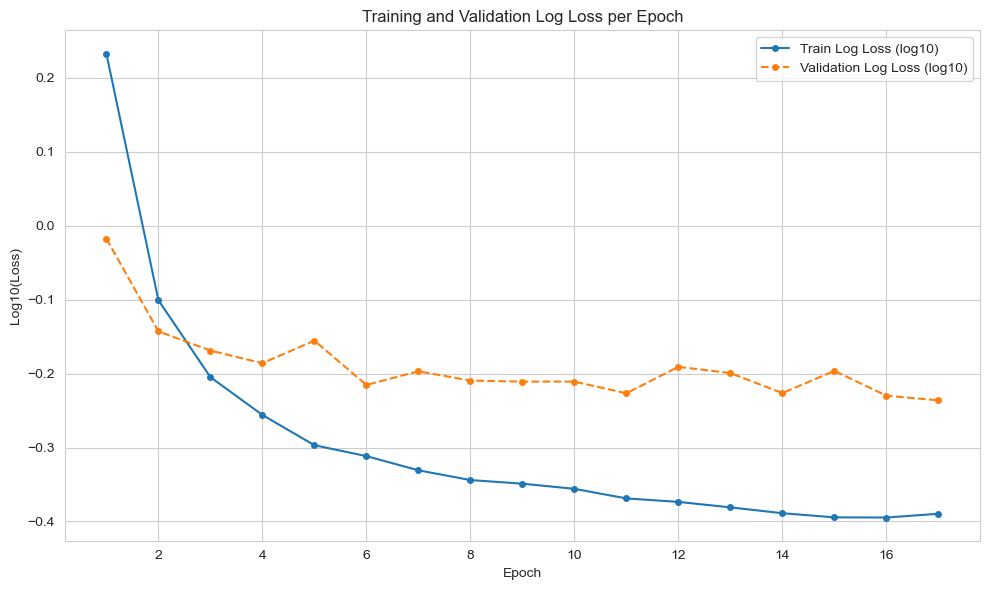

In [46]:
# Jupyter Notebook Cell 3: Log Loss Curve Plot

# Apply log10 to the loss values. Add a small epsilon to avoid log(0) issues if loss hits zero.
epsilon = 1e-9
df['train_log_loss'] = np.log10(df['train_loss'] + epsilon)
df['val_log_loss'] = np.log10(df['val_loss'] + epsilon)

plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['train_log_loss'], label='Train Log Loss (log10)', marker='o', markersize=4, linestyle='-')
plt.plot(df['epoch'], df['val_log_loss'], label='Validation Log Loss (log10)', marker='o', markersize=4, linestyle='--')
plt.title('Training and Validation Log Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Log10(Loss)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(output_path, 'log_loss_curve.png'))  # Save as PNG
plt.show()

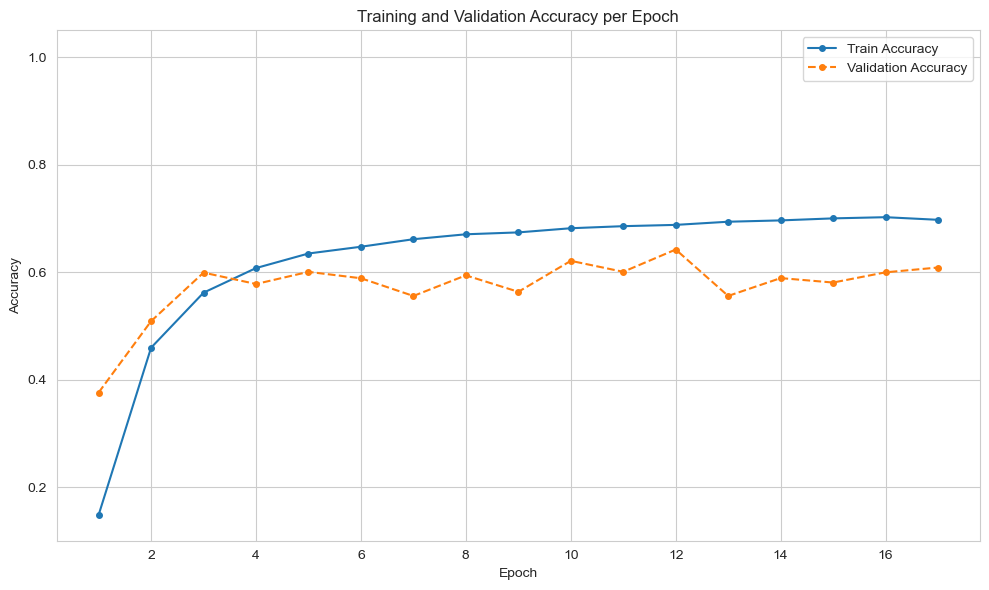

In [47]:
# Jupyter Notebook Cell 4: Accuracy Curve Plot

plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['train_accuracy'], label='Train Accuracy', marker='o', markersize=4, linestyle='-')
plt.plot(df['epoch'], df['val_accuracy'], label='Validation Accuracy', marker='o', markersize=4, linestyle='--')
plt.title('Training and Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.ylim(.1, 1.05)  # Accuracy typically ranges from 0 to 1
plt.tight_layout()
plt.savefig(os.path.join(output_path, 'accuracy_curve.png'))
plt.show()

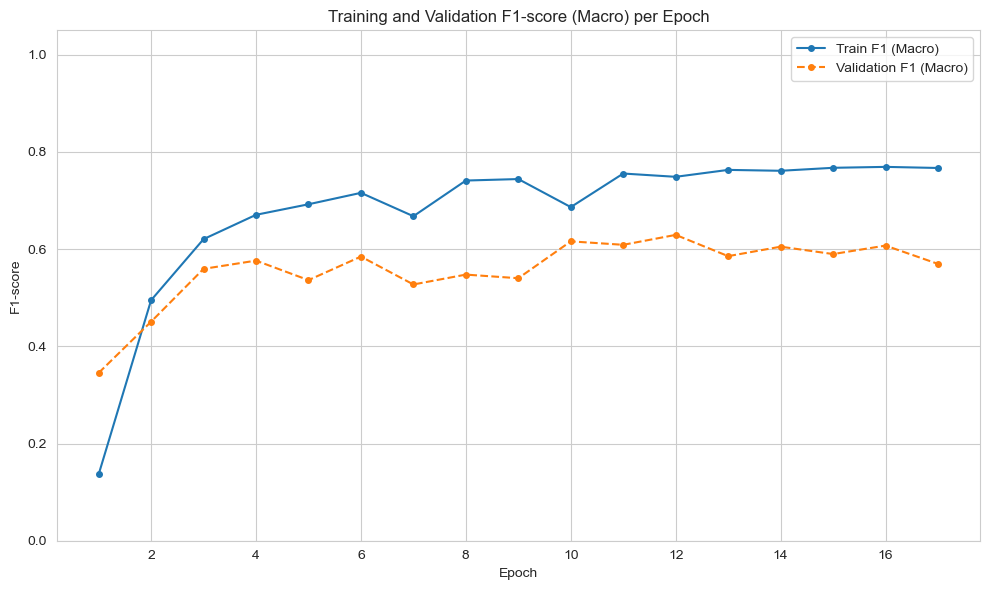

In [48]:
# Jupyter Notebook Cell 5: Placeholder for F1-score and other metrics
plt.figure(figsize=(10, 6))

plt.plot(df['epoch'], df['train_f1_macro'], label='Train F1 (Macro)', marker='o', markersize=4, linestyle='-')
plt.plot(df['epoch'], df['val_f1_macro'], label='Validation F1 (Macro)', marker='o', markersize=4, linestyle='--')
plt.title('Training and Validation F1-score (Macro) per Epoch')
plt.xlabel('Epoch')
plt.ylabel('F1-score')
plt.legend()
plt.grid(True)
plt.ylim(0, 1.05)
plt.tight_layout()
plt.savefig(os.path.join(output_path, 'f1_score_macro_curve.png'))
plt.show()

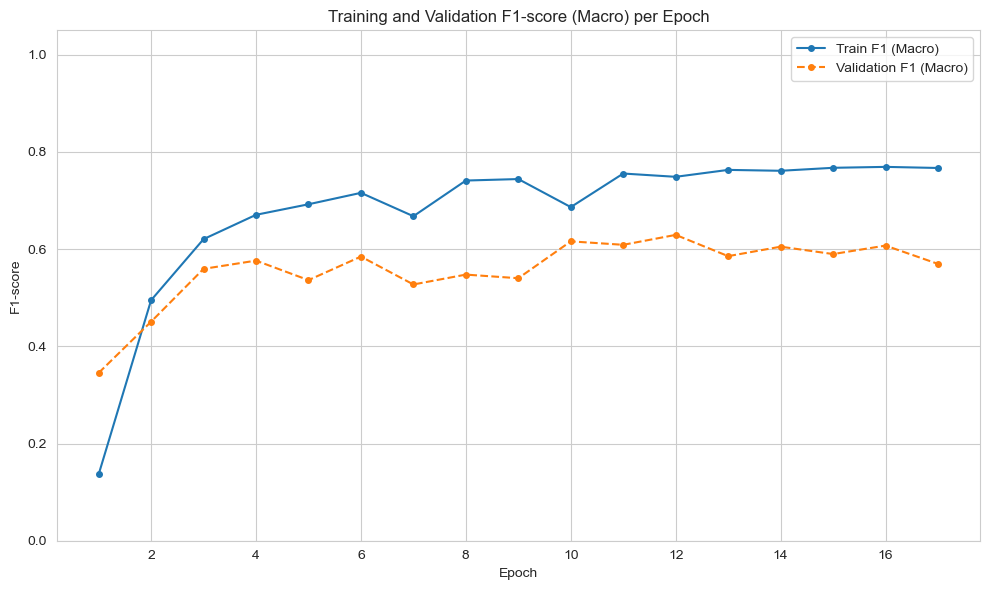

In [49]:
# Jupyter Notebook Cell 5: Placeholder for F1-score and other metrics

# IMPORTANT:
# Your provided data string does *not* contain F1-score or other detailed metrics.
# To plot F1-score, you must:
# 1. Ensure your `calculate_metrics` function in your training script *actually computes and returns* F1-score.
#    (e.g., metrics['f1_macro'] = f1_score(true_labels, predictions, average='macro'))
# 2. Append these F1-scores to dedicated lists in your main training loop
#    (e.g., `train_f1_scores = []`, `val_f1_scores = []`).
# 3. Save these lists to your `metrics_df` DataFrame using `df['train_f1'] = train_f1_scores`, etc.
# 4. Then, you can either:
#    a) Load the saved `metrics_df.csv` (see Cell 6)
#    b) Re-run your training script to generate the full data in the notebook if you integrate everything here.

# For now, let's create dummy F1-score data to demonstrate the plotting
# Replace this with your actual loaded/computed F1 scores once available
# Assuming F1 scores are similar to accuracy for this example

plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['train_f1_macro'], label='Train F1 (Macro)', marker='o', markersize=4, linestyle='-')
plt.plot(df['epoch'], df['val_f1_macro'], label='Validation F1 (Macro)', marker='o', markersize=4, linestyle='--')
plt.title('Training and Validation F1-score (Macro) per Epoch')
plt.xlabel('Epoch')
plt.ylabel('F1-score')
plt.legend()
plt.grid(True)
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()

In [50]:
# Jupyter Notebook Cell 6: Example of Loading from CSV (if you save your DataFrame)

# Assuming you've run your training script and saved the metrics_df to a CSV:
# metrics_df.to_csv(os.path.join(output_path, 'metrics_df.csv'), index=False)

# To load it later in a new notebook session:
# import pandas as pd
# import os # You might need this if your path is relative

# file_path = 'path/to/your/output_folder/metrics_df.csv' # Replace with your actual path
# if os.path.exists(file_path):
#     loaded_df = pd.read_csv(file_path)
#     print("Loaded DataFrame head:")
#     print(loaded_df.head())
#     # You can then use loaded_df for all the plotting cells above
# else:
#     print(f"File not found at: {file_path}. Make sure to run your training script first.")